# Getting Text from .csv files

In [ ]:
import csv
labels = []
sentences = []
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
import json
#with open('Sarcasm_Headlines_Dataset.json', 'r') as f:
    #datastore = json.load(f)

In [ ]:
tweets = []
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    tweets.append(json.loads(line))
    #for item in tweets:
        #sentence = item['headline'].lower()
        #label = item['is_sarcastic']
        #lin = item['article_link']

In [ ]:
sentences = []
labels = []
urls = []
for item in tweets:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    table = str.maketrans(' ' , ' ', string.punctuation)
    filtered_sentence = " "
    for word in words:
        word = word.translate(table)
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [ ]:
type(sentences)

In [ ]:
training_size = 20000
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]
#print(train_sentences)
len(train_sentences)

In [ ]:
len(test_sentences), 20000/26709*100

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 1000
max_len = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padding = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [ ]:
val_padding = train_padding[15000:]
val_labels = training_labels[15000:]
train_padding = train_padding[:15000]
training_labels = training_labels[:15000]

In [ ]:
print(train_sequences)

In [ ]:
tokenizer.fit_on_texts(test_sentences)
word_index = tokenizer.word_index
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padding = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

# Making Sentiment Programmable Using Embeddings

# How to Establish Meaning to the words or a ssentence
# This is established using EMBEDDINGS : which creates a high demensional space for representing words. 

## The direction of these vectors can be learned over time based on the words in the corpus.

### Given a sentence, you can investigate the directions of word vectors, sum them up and from the overall direction if the summarization establish the sentiment of the sentence as a product of its words.


# How meaning can be derived from numerics.

## Positive --> Sarcastic = '1'
## christian bale given 

### Lets assume, all words start with a value of '0'. we could add '1' to each of the words.


# {"christian":1, "bale":1, "given":1, "neutered":1,  "male":1,  "statuette":1, "named":1, "oscar":1.}

## Negative ---> Sarcastic = '0'
## 3 lessons for america from christian bale's moses

### Subtract '1' from the current value of each word and it looks like this...

# {"christian":0, "bale":0, "given":1, "neutered":1,  "male":1,  "statuette":1, "named":1, "oscar":1, "lessons":-1, "america":-1, "moses":-1,"3":-1}

#### "christian":0, "bale":0, got offseted by non sarcastic words. 
# Repeat this process 1000's of times and we end up with a huge list of words from the corpus scored based on usage.

# Establish the sentiment of the following sentence.. .   ... .
## neutered male statuette wins 3 america oscar
##     1            1          1           0     -1     -1          1
### ADD = 2..... Guess the Output

# Let's Explore "Embeddings in Tensorflow"

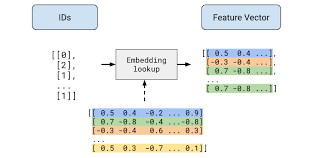

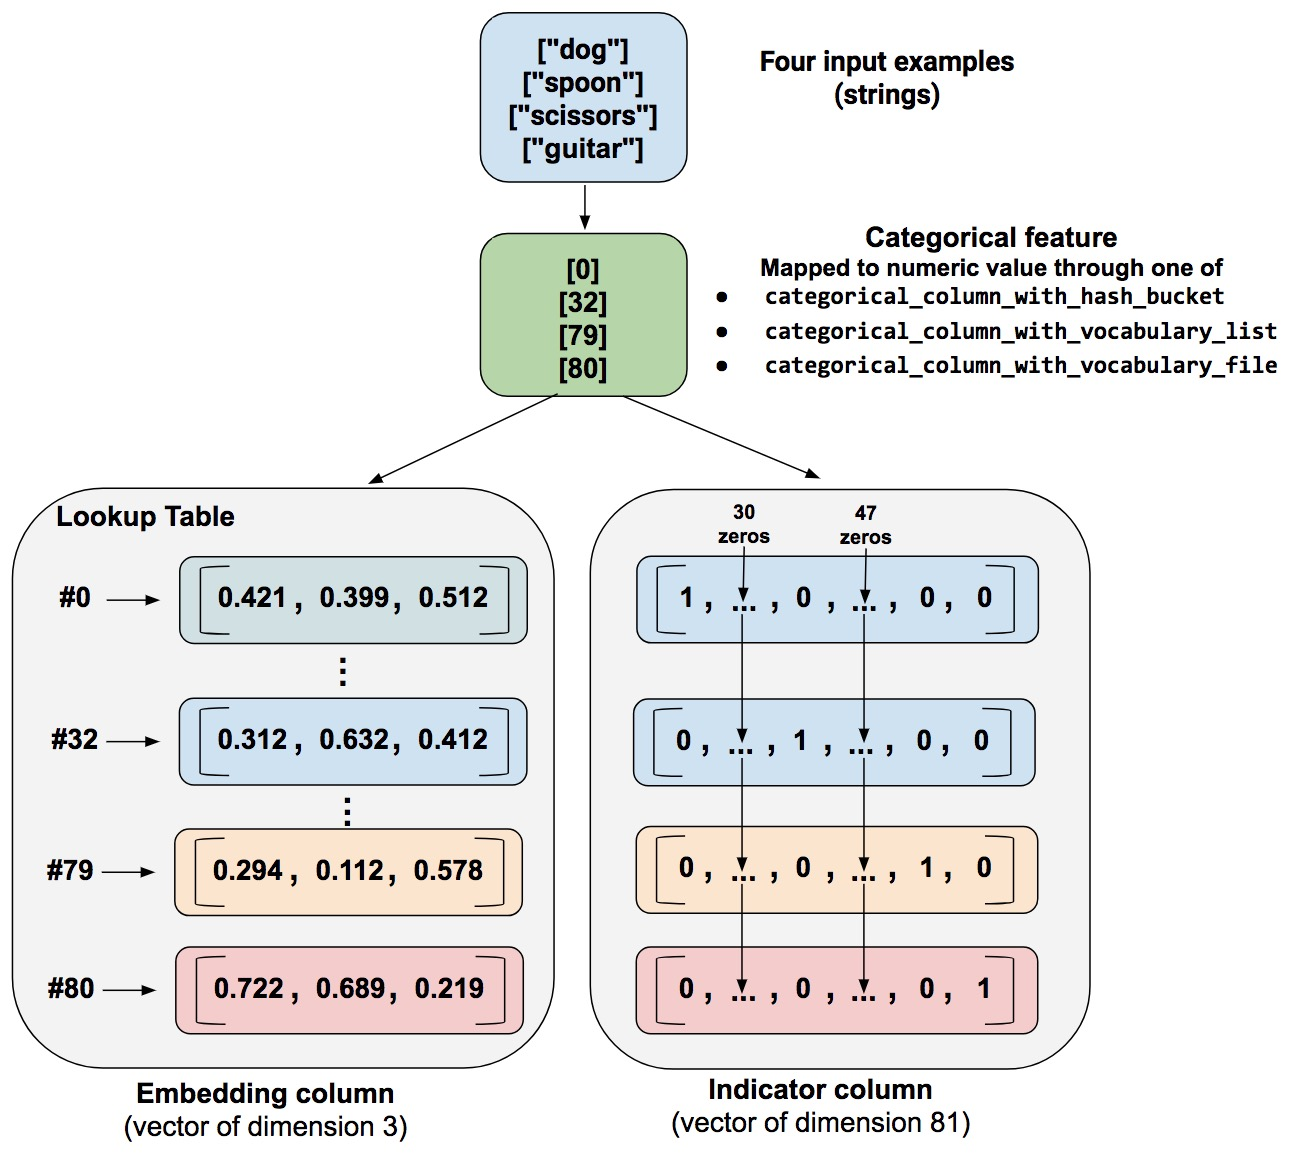

# Use Embeddings as a Layer in tf.keras.layers
### This creates a LOOK UP Table for mapping an integer to an embedding table consistings of vectors representing the word pointed by the integer. 

# Let's build a sarcasam detector........... . . ........... . . . . .... ... 

In [ ]:
import numpy as np
train_padded = np.array(train_padding)
test_padded = np.array(test_padding)
train_labels = np.array(training_labels)
test_labels = np.array(test_labels)
val_padding = np.array(val_padding)
val_labels = np.array(val_labels)

# Initialization of Embedding Layer


# SYNTAX
tf.keras.layers.Embeddings(vocab_size, embedding_dim)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
#model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
#model.summary()

### Vocabulary Size = 10000 with an embedding dimension of 16. Means that each word will have a vector size of 16. Hence the total number of trainable parameters is 160K.

### Averaging pooling dosen't have any trainable parameters....bcz its just averaging on the all the vocabulary.... to get a 16 value vector.

### 24 neuron dense layer. input is a 16 value averaged vector. Hence 16X24 + 16 (biases) = 408 trainable parameters.

### The output is 24 weights + 1 bias = 25 trainable parameters.

In [ ]:
#tf.keras.utils.plot_model(model, show_shapes = True)

# Since the vocab_size = 10000, that will be enoded into a higher dimension of 16, we have 160K trainable Parameters

In [ ]:
#history = model.fit(train_padded,train_labels, epochs = 10, batch_size = 16,validation_data = (val_padding,val_labels))

# Lr is a paramter of the optimizer that we select.

In [ ]:
#model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

# The optimizer uses default parameters.
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.00001, beta_1 =0.9, beta_2=0.999, amsgrad = False)

# the lr = 90% of default 0.001. beta_1 & beta_2 same as default, "amsgrad" is the 

In [ ]:
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(train_padded,train_labels, epochs = 100, batch_size = 16,validation_data = (val_padding,val_labels))

In [ ]:
results = model.evaluate(test_padded,test_labels)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values = history_dict['acc']#[1:10]
acc_val_values = history_dict['val_acc']#[1:10]
#epochs = range(9)
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, acc_val_values, 'r', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#tf.keras.backend.clear_session()

# What will happen if lr is 0.0001. Take a look.

# Another Way of Reducing Overfitting by Tuning Vocabulary Size

In [ ]:
from nltk.tokenize import word_tokenize
wc = nltk.FreqDist(sentences[10])
print(wc)

In [ ]:
text = "I love NLP and I will learn NLP in 2 months"
words = nltk.word_tokenize(sentences[1])
words
wc = nltk.FreqDist(words)

In [ ]:
wc.plot(20)

In [ ]:
from collections import OrderedDict
wc= tokenizer.word_counts
wc

# Word Orders are by the order of appearance in the dataset.

# Now sort the words in OrderDict in descending order of word volume or count

In [ ]:
New_list = OrderedDict(sorted(wc.items(),key = lambda t:t[1], reverse=True))
print(New_list)

In [ ]:
wc = nltk.FreqDist(New_list)

In [ ]:
wc.plot(500)

# Whats the Catch?
## Very few words are used many times, whereas most of the words are used very few times.
## But in the embedding space each word is important and has been given equal weightage.
### Training_Set >>>>>>>>>>>Validation set. -- Right. So Many words in the training set are missing from the validation set. 

# The Code Solution

### Check what happens when the network is trained with 2000 vocabulary size- - - Self Check...Please

# Its worth experimenting with different Vocab sizes to find a balance to avoid OVERFITTING.

# What Else Can be done to AVOID Overfitting in Text Processing.....
## PLay with Embedding size...here we used 16....check for <>16 and see how it effects the overall preformance of the network.

# Exploring Network Architecture is the Best Procedure.

In [ ]:
model_a = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000,7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model_a.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
history = model_a.fit(train_padded,train_labels, epochs = 10, batch_size = 16,validation_data = (val_padding,val_labels))

In [ ]:
results_a = model_a.evaluate(test_padded,test_labels)

In [ ]:
history_dict_a = history.history

In [ ]:
plt.clf()
loss_values = history_dict_a['loss']
val_loss_values = history_dict_a['val_loss']
epochs = range(1, len(history_dict_a['loss'])+1)
plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values = history_dict_a['acc']#[1:10]
acc_val_values = history_dict_a['val_acc']#[1:10]
#epochs = range(9)
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, acc_val_values, 'r', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Another Method .... ADD DroupOut

In [ ]:
model_b = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model_b.summary()

In [ ]:
model_b.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
history = model_b.fit(train_padded,train_labels, epochs = 10, batch_size = 16,validation_data = (val_padding,val_labels))

In [ ]:
results_b = model_b.evaluate(test_padded,test_labels)
history_dict_b = history.history

plt.clf()
loss_values = history_dict_b['loss']
val_loss_values = history_dict_b['val_loss']
epochs = range(1, len(history_dict_b['loss'])+1)
plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values = history_dict_b['acc']#[1:10]
acc_val_values = history_dict_b['val_acc']#[1:10]
#epochs = range(9)
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, acc_val_values, 'r', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Inducing Dropout is Probably NOT A GOOD IDEA.

# USe Regularizers

# Reduces weight Polarization. When some neurons are heavy, regularization punishes them. Two Types L1 & L2.

## L1 or LASSO(Least Absolute Shrinkage and Selection Operator): ignore the zero or Close to zero weights in calculation of outputs across layers.

## L2 or RIDGE regression. Pushes squared values far apart maximizing the difference between the zero closers and nonzeros ..... creating a ridge effect.

### L1 and L2 Combined into ELASTIC Regularixation.
# NLP -- L2 works. It can added as an attribute in Dense layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation ='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model.fit(train_padded,train_labels, epochs = 10, batch_size = 16,validation_data = (val_padding,val_labels))

results = model.evaluate(test_padded,test_labels)
history_dict = history.history

plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values = history_dict['acc']#[1:10]
acc_val_values = history_dict['val_acc']#[1:10]
#epochs = range(9)
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, acc_val_values, 'r', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Using Model to Classify Sentence

In [ ]:
sen_tester = ["granny starting to fear spiders in the garden might be real",
             "games of thrones season finale showing this sunday night",
             "Tensorflow book will be the best seller"]

In [ ]:
sequences = tokenizer.texts_to_sequences(sen_tester)

In [ ]:
print(sequences)

# Before passing it to the model... reshape it as the model expects it to be ..

In [ ]:
pad_sen_tester = pad_sequences(sequences, maxlen = 11, padding = padding_type, truncating = trunc_type)
#max_len = 10
#trunc_type = 'post'
#padding_type = 'post'
print(pad_sen_tester)

In [ ]:
print(model.predict(pad_sen_tester))